<a href="https://colab.research.google.com/github/SahithReddy-GitHub/Pneumonia-Detection-Using-CNN/blob/main/Inception_V3_256x256_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model :- Inception V3<br/>
Total Data :- 5850<br/>
Image_size :- 256x256<br/>
Epochs :- 5<br/>
Accuracy :-  91.7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
normal_train_path=r"/content/drive/MyDrive/Resized_Data/R_NORMAL_Gray_1341_train"
normal_train_img=os.listdir(normal_train_path)

normal_train=[]
for img in normal_train_img:
  input_img=cv2.imread(normal_train_path+'/'+img,0)
  input_img=cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  normal_train.append(input_img)
print("Shape : ",np.shape(normal_train))

normal_train_array = np.array(normal_train)
normal_train_array=normal_train_array.astype('float32')

normal_train_array=normal_train_array/255
normal_train_array.shape

Shape :  (1341, 256, 256, 3)


(1341, 256, 256, 3)

In [3]:
pneumonic_train_path=r"/content/drive/MyDrive/Resized_Data/R_PNEUMONIA_Gray_3875_train"
pneumonic_train_img=os.listdir(pneumonic_train_path)

pneumonic_train=[]
for img in pneumonic_train_img:
  input_img=cv2.imread(pneumonic_train_path+'/'+img,0)
  input_img=cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  pneumonic_train.append(input_img)
print("Shape : ",np.shape(pneumonic_train))

pneumonic_train_array = np.array(pneumonic_train)
pneumonic_train_array=pneumonic_train_array.astype('float32')

pneumonic_train_array=pneumonic_train_array/255
pneumonic_train_array.shape

Shape :  (3885, 256, 256, 3)


(3885, 256, 256, 3)

In [4]:
normal_test_path=r"/content/drive/MyDrive/Resized_Data/R_NORMAL_Gray_234_test"
normal_test_img=os.listdir(normal_test_path)

normal_test=[]
for img in normal_test_img:
  input_img=cv2.imread(normal_test_path+'/'+img,0)
  input_img=cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  normal_test.append(input_img)
print("Shape : ",np.shape(normal_test))

normal_test_array = np.array(normal_test)
normal_test_array=normal_test_array.astype('float32')

normal_test_array=normal_test_array/255
normal_test_array.shape

Shape :  (234, 256, 256, 3)


(234, 256, 256, 3)

In [5]:
pneumonic_test_path=r"/content/drive/MyDrive/Resized_Data/R_PNEUMONIA_Gray_390_test"
pneumonic_test_img=os.listdir(pneumonic_test_path)

pneumonic_test=[]
for img in pneumonic_test_img:
  input_img=cv2.imread(pneumonic_test_path+'/'+img,0)
  input_img = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
  pneumonic_test.append(input_img)

print("Shape : ",np.shape(pneumonic_test))

pneumonic_test_array = np.array(pneumonic_test)
pneumonic_test_array=pneumonic_test_array.astype('float32')

pneumonic_test_array=pneumonic_test_array/255
pneumonic_test_array.shape

Shape :  (390, 256, 256, 3)


(390, 256, 256, 3)

In [6]:
x_train=np.vstack((normal_train,pneumonic_train))
x_test=np.vstack((normal_test,pneumonic_test))
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)

y_train=(([0]*normal_train_array.shape[0]) + ([1]*pneumonic_train_array.shape[0]))
y_test=(([0]*normal_test_array.shape[0]) + ([1]*pneumonic_test_array.shape[0]))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train,y_train = shuffle(x_train,y_train,random_state=3)
x_test,y_test = shuffle(x_test,y_test,random_state=3)


x_train :  (5226, 256, 256, 3)
x_test :  (624, 256, 256, 3)
y_train :  5226
y_test :  624



<b><h1>Model</h1></b>

In [7]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [8]:
Inception_model = Sequential()
model=tf.keras.applications.InceptionV3(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,3),
    classes=2,
    classifier_activation="softmax",
)

for layers in model.layers:
  layers.trainable = False
Inception_model.add(model)
Inception_model.add(Flatten())
Inception_model.add(Dense(256,activation="relu"))
Inception_model.add(Dense(128,activation="relu"))
Inception_model.add(Dense(2,activation="softmax"))

In [9]:
Inception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 module_wrapper (ModuleWrapp  (None, 73728)            0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 256)              18874624  
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 128)              32896     
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2)                258       
 pper)                                                  

In [10]:
Inception_model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
history = Inception_model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
164/164 [==============================] - 31s 113ms/step - loss: 4.2031 - accuracy: 0.6812 - val_loss: 0.4074 - val_accuracy: 0.8494
Epoch 2/10
164/164 [==============================] - 15s 94ms/step - loss: 0.3426 - accuracy: 0.8624 - val_loss: 0.4226 - val_accuracy: 0.8045
Epoch 3/10
164/164 [==============================] - 16s 95ms/step - loss: 0.2937 - accuracy: 0.8802 - val_loss: 0.3435 - val_accuracy: 0.8574
Epoch 4/10
164/164 [==============================] - 16s 96ms/step - loss: 0.2666 - accuracy: 0.8900 - val_loss: 0.3439 - val_accuracy: 0.8670
Epoch 5/10
164/164 [==============================] - 16s 97ms/step - loss: 0.2537 - accuracy: 0.9030 - val_loss: 0.5542 - val_accuracy: 0.7788
Epoch 6/10
164/164 [==============================] - 17s 103ms/step - loss: 0.2853 - accuracy: 0.8957 - val_loss: 0.5692 - val_accuracy: 0.6971
Epoch 7/10
164/164 [==============================] - 16s 98ms/step - loss: 0.2364 - accuracy: 0.9099 - val_loss: 0.3949 - val_accurac

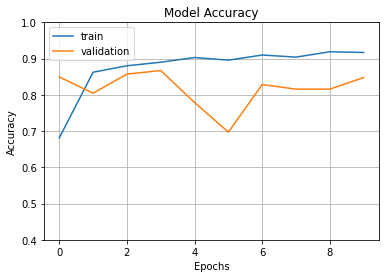

In [12]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()